In [946]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [947]:
df = pd.read_csv('2015_norm.csv')
df

,Unnamed: 0,Date,SANTANDER,UNICREDIT,CEZ,PKNORLEN,PKOBP,DINOPL,PZU,ALLEGRO,...,WIRTUALNA,GRUPRACUJ,NEUCA,STSHLDING,PLAYWAY,DOMDEV,ASSECOSEE,CIECH,BENEFIT,PCCROKITA
0,0,2015-01-02,inf,inf,inf,inf,inf,NaN,inf,NaN,...,NaN,NaN,inf,NaN,NaN,inf,inf,inf,inf,inf
1,0,2015-01-05,0.075328,0.152951,0.039616,0.008836,0.005596,NaN,0.010363,NaN,...,NaN,NaN,0.018034,NaN,NaN,0.124489,0.147493,0.011834,0.065574,0.027723
2,0,2015-01-07,inf,0.077023,0.032535,0.016422,0.007952,NaN,0.015536,NaN,...,NaN,NaN,0.000458,NaN,NaN,0.044728,0.038107,0.015636,0.018337,0.007864
3,0,2015-01-08,0.051282,0.024805,0.038135,0.014725,0.008494,NaN,0.010649,NaN,...,NaN,NaN,0.022573,NaN,NaN,0.044237,0.126168,0.001911,0.022472,0.013975
4,0,2015-01-09,0.082927,0.067416,0.043353,0.022649,0.004382,NaN,0.011266,NaN,...,NaN,NaN,0.012744,NaN,NaN,0.016173,0.060606,0.028035,0.107458,0.010129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0,2015-12-22,0.100525,0.080977,0.030472,0.010050,0.010253,NaN,0.002336,NaN,...,0.091679,NaN,0.024291,NaN,NaN,0.047420,0.024291,0.004808,0.095939,0.008262
247,0,2015-12-23,0.099575,0.080977,0.016549,0.011787,0.008417,NaN,0.022420,NaN,...,0.094241,NaN,0.024291,NaN,NaN,0.020121,0.009226,0.032305,0.030702,0.019169
248,0,2015-12-28,0.074037,0.080977,0.029851,0.012792,0.005141,NaN,0.001463,NaN,...,0.029949,NaN,0.029988,NaN,NaN,0.043522,0.009226,0.017291,0.052506,0.019129
249,0,2015-12-29,0.072985,0.080977,0.042121,0.002798,0.005859,NaN,0.002671,NaN,...,0.030199,NaN,0.008203,NaN,NaN,0.043522,0.009226,0.019619,0.040816,0.002068


In [948]:
df.columns

Index(['Unnamed: 0', 'Date', 'SANTANDER', 'UNICREDIT', 'CEZ', 'PKNORLEN',
       'PKOBP', 'DINOPL', 'PZU', 'ALLEGRO', 'SANPL', 'KGHM', 'MOL', 'PEKAO',
       'PEPCO', 'INGBSK', 'LPP', 'PGE', 'KRKA', 'MBANK', 'CDPROJEKT',
       'CYFRPLSAT', 'HANDLOWY', 'ORANGEPL', 'BNPPL', 'IIAAV', 'BUDIMEX', 'JSW',
       'KRUK', 'MILLENNIUM', 'INTERCARS', 'ASSECOPOL', 'PEP', 'ALIOR', 'KETY',
       'GRPAAZOTY', 'AMREST', 'XTB', 'TAURONPE', 'GTC', 'ENEA', 'LIVECHAT',
       'WIRTUALNA', 'GRUPRACUJ', 'NEUCA', 'STSHLDING', 'PLAYWAY', 'DOMDEV',
       'ASSECOSEE', 'CIECH', 'BENEFIT', 'PCCROKITA'],
      dtype='object')

In [949]:
df = df[['Date', 'PKNORLEN', 'CDPROJEKT', 'PKOBP']] 
df

,Date,PKNORLEN,CDPROJEKT,PKOBP
0,2015-01-02,inf,inf,inf
1,2015-01-05,0.008836,0.017910,0.005596
2,2015-01-07,0.016422,0.005401,0.007952
3,2015-01-08,0.014725,0.014948,0.008494
4,2015-01-09,0.022649,0.008947,0.004382
...,...,...,...,...
246,2015-12-22,0.010050,0.020776,0.010253
247,2015-12-23,0.011787,0.013206,0.008417
248,2015-12-28,0.012792,0.021505,0.005141
249,2015-12-29,0.002798,0.012694,0.005859


In [950]:
def del_negative(x):
    if x == np.inf: return np.nan
    return x if x > 0 else np.nan

df['PKNORLEN'] = df['PKNORLEN'].apply(del_negative)
df['CDPROJEKT'] = df['CDPROJEKT'].apply(del_negative)
df['PKOBP'] = df['PKOBP'].apply(del_negative)

C:\Users\lukas\AppData\Local\Temp/ipykernel_29268/43115445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PKNORLEN'] = df['PKNORLEN'].apply(del_negative)
C:\Users\lukas\AppData\Local\Temp/ipykernel_29268/43115445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CDPROJEKT'] = df['CDPROJEKT'].apply(del_negative)
C:\Users\lukas\AppData\Local\Temp/ipykernel_29268/43115445.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

<AxesSubplot:>

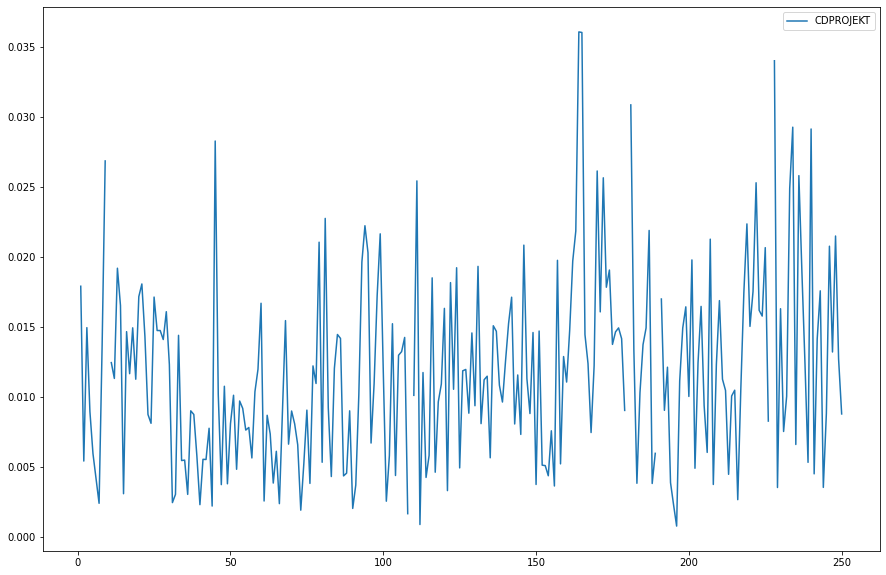

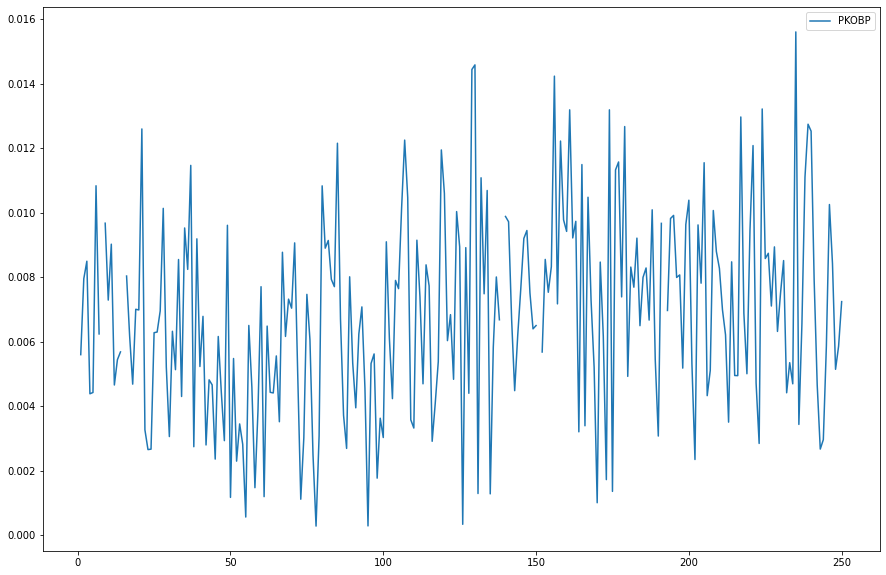

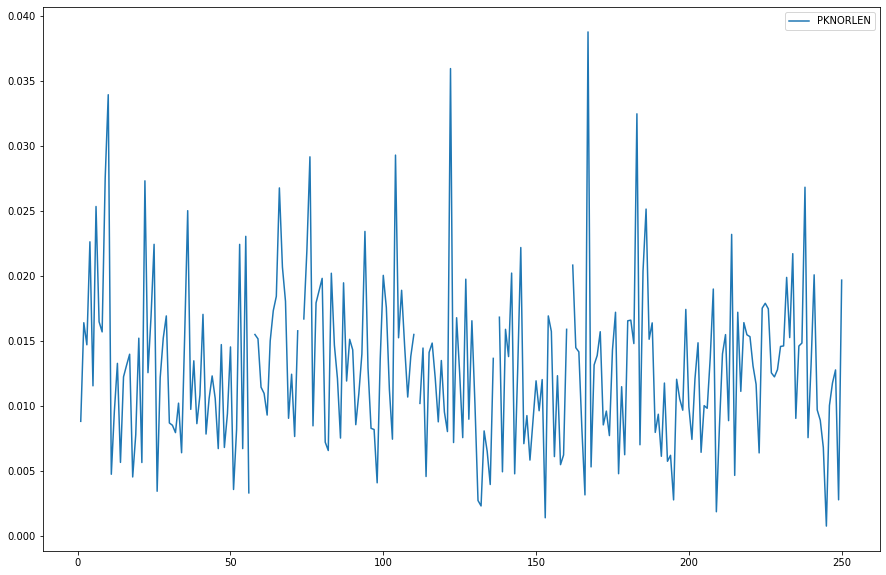

In [951]:
df.plot(use_index=True, y='CDPROJEKT', figsize=(15,10))
df.plot(use_index=True, y='PKOBP', figsize=(15,10))
df.plot(use_index=True, y='PKNORLEN', figsize=(15,10))

In [952]:
df.isna().sum()

Date         0
PKNORLEN     6
CDPROJEKT    6
PKOBP        6
dtype: int64

In [953]:
df['CDPROJEKT_ln_diff'] = np.log(df['CDPROJEKT'].shift(-1)) - np.log(df['CDPROJEKT'])
df['PKNORLEN_ln_diff'] = np.log(df['PKNORLEN'].shift(-1)) - np.log(df['PKNORLEN'])
df['PKOBP_ln_diff'] = np.log(df['PKOBP'].shift(-1)) - np.log(df['PKOBP'])
df

C:\Users\lukas\AppData\Local\Temp/ipykernel_29268/1618434881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CDPROJEKT_ln_diff'] = np.log(df['CDPROJEKT'].shift(-1)) - np.log(df['CDPROJEKT'])
C:\Users\lukas\AppData\Local\Temp/ipykernel_29268/1618434881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PKNORLEN_ln_diff'] = np.log(df['PKNORLEN'].shift(-1)) - np.log(df['PKNORLEN'])
C:\Users\lukas\AppData\Local\Temp/ipykernel_29268/1618434881.py:3: SettingWithCopyWarning: 
A value is trying to be s

,Date,PKNORLEN,CDPROJEKT,PKOBP,CDPROJEKT_ln_diff,PKNORLEN_ln_diff,PKOBP_ln_diff
0,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,0.008836,0.017910,0.005596,-1.198885,0.619822,0.351413
2,2015-01-07,0.016422,0.005401,0.007952,1.018057,-0.109089,0.065874
3,2015-01-08,0.014725,0.014948,0.008494,-0.513214,0.430555,-0.661745
4,2015-01-09,0.022649,0.008947,0.004382,-0.410522,-0.671914,0.009080
...,...,...,...,...,...,...,...
246,2015-12-22,0.010050,0.020776,0.010253,-0.453158,0.159420,-0.197259
247,2015-12-23,0.011787,0.013206,0.008417,0.487667,0.081795,-0.492954
248,2015-12-28,0.012792,0.021505,0.005141,-0.527154,-1.520046,0.130598
249,2015-12-29,0.002798,0.012694,0.005859,-0.369592,1.951894,0.211856


In [954]:
df.isna().sum()

Date                  0
PKNORLEN              6
CDPROJEKT             6
PKOBP                 6
CDPROJEKT_ln_diff    12
PKNORLEN_ln_diff     12
PKOBP_ln_diff        12
dtype: int64

In [955]:
df = df.dropna().reset_index(drop=True) #AD_HOCK -> TODO !
df

,Date,PKNORLEN,CDPROJEKT,PKOBP,CDPROJEKT_ln_diff,PKNORLEN_ln_diff,PKOBP_ln_diff
0,2015-01-05,0.008836,0.017910,0.005596,-1.198885,0.619822,0.351413
1,2015-01-07,0.016422,0.005401,0.007952,1.018057,-0.109089,0.065874
2,2015-01-08,0.014725,0.014948,0.008494,-0.513214,0.430555,-0.661745
3,2015-01-09,0.022649,0.008947,0.004382,-0.410522,-0.671914,0.009080
4,2015-01-12,0.011567,0.005935,0.004422,-0.360525,0.785220,0.896099
...,...,...,...,...,...,...,...
214,2015-12-21,0.000775,0.008811,0.005865,0.857842,2.561852,0.558517
215,2015-12-22,0.010050,0.020776,0.010253,-0.453158,0.159420,-0.197259
216,2015-12-23,0.011787,0.013206,0.008417,0.487667,0.081795,-0.492954
217,2015-12-28,0.012792,0.021505,0.005141,-0.527154,-1.520046,0.130598


<AxesSubplot:>

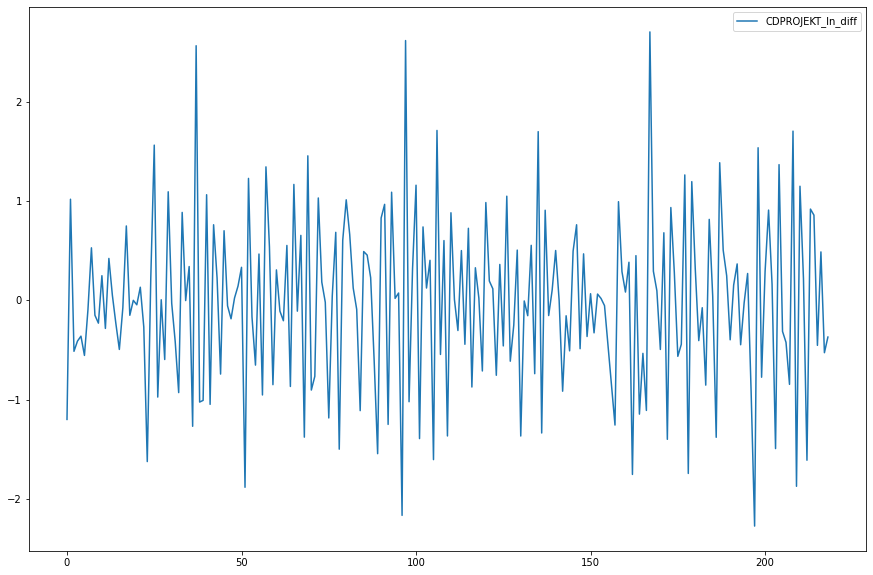

In [956]:
df.plot(use_index=True, y='CDPROJEKT_ln_diff', figsize=(15,10))


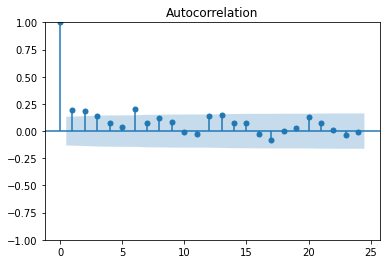

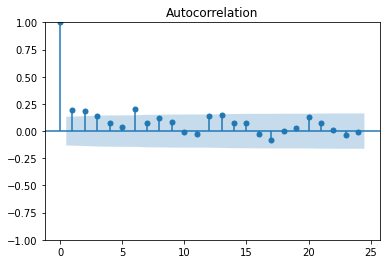

In [957]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['CDPROJEKT'].values)

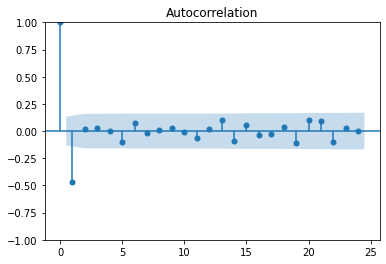

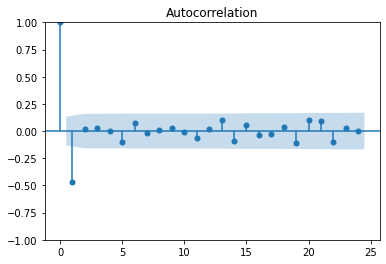

In [958]:
plot_acf(df['CDPROJEKT_ln_diff'].values)

In [959]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['CDPROJEKT'].values)
print('p-value(CDPROJEKT):', result[1])
result = adfuller(df['CDPROJEKT_ln_diff'].values)
print('p-value(CDPROJEKT_ln_diff):', result[1])

p-value(CDPROJEKT): 0.0007428651052679642
p-value(CDPROJEKT_ln_diff): 1.0651001494258781e-14


C:\Users\lukas\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


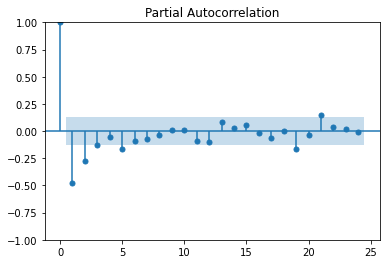

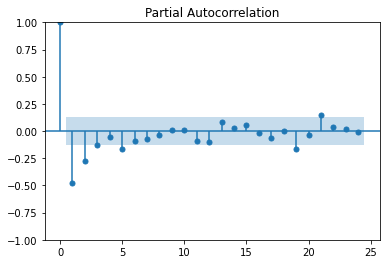

In [960]:

plot_pacf(df['CDPROJEKT_ln_diff'].values)


<AxesSubplot:>

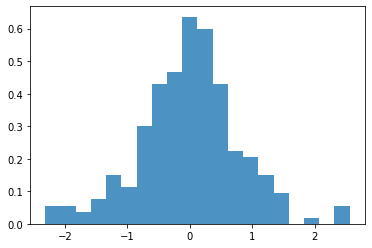

In [961]:
from copulas.visualization import hist_1d, side_by_side

copula = df[['PKNORLEN_ln_diff']]
hist_1d(copula)

In [962]:
from copulas.univariate import BetaUnivariate

beta = BetaUnivariate()
beta.fit(copula)

C:\Users\lukas\AppData\Roaming\Python\Python38\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [963]:
beta._params

{'loc': -1.9817102674760632,
 'scale': 30.305274630392127,
 'a': 4.9362726237354595,
 'b': 69.3610211306487}

In [964]:
copula

,PKNORLEN_ln_diff
0,0.619822
1,-0.109089
2,0.430555
3,-0.671914
4,0.785220
...,...
214,2.561852
215,0.159420
216,0.081795
217,-1.520046


In [965]:
from copulas.visualization import compare_1d

sampled = beta.sample(1000)

<AxesSubplot:>

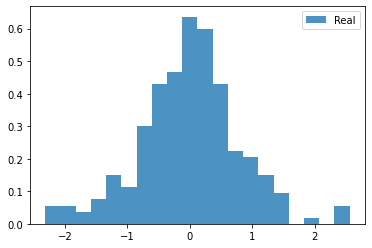

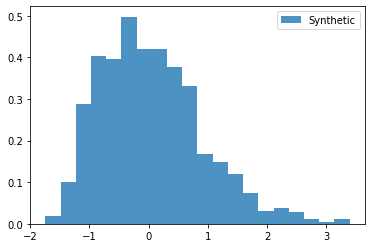

In [966]:
hist_1d(copula,  label='Real')
hist_1d(sampled, label='Synthetic')

<AxesSubplot:xlabel='data'>

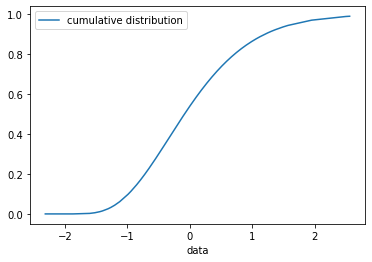

In [967]:
cumulative_distribution = beta.cumulative_distribution(copula.values.flatten())
pd.DataFrame({
    'data': copula.values.flatten(),
    'cumulative distribution': cumulative_distribution
}).sort_values('data').set_index('data').plot()

In [968]:
probability_density = beta.pdf(copula.values.flatten())

<AxesSubplot:xlabel='data'>

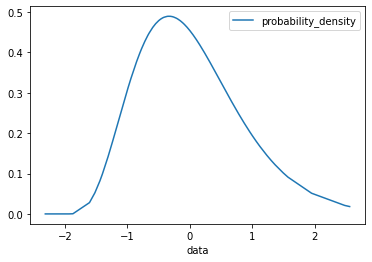

In [969]:
pd.DataFrame({
    'data': copula.values.flatten(),
    'probability_density': probability_density
}).sort_values('data').set_index('data').plot()

In [970]:
from scipy.stats import moment

moment(copula.values.flatten(), [0, 1,2,3,4,5,6,7,8])

array([1.00000000e+00, 0.00000000e+00, 6.52301016e-01, 5.46846598e-03,
       1.67506325e+00, 4.07868487e-01, 7.01314089e+00, 4.35142740e+00,
       3.57971245e+01])

In [971]:
moment(sampled, [0, 1,2,3,4,5,6,7,8])

array([ 1.        ,  0.        ,  0.7396743 ,  0.44740332,  1.89435622,
        3.20692199,  9.66257376, 23.93162444, 70.04049392])

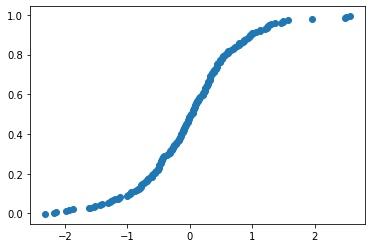

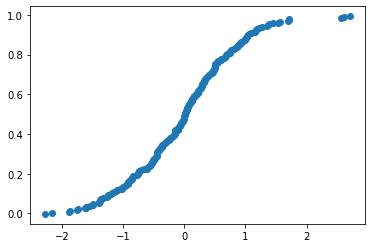

In [972]:
syt1 = df[['PKNORLEN_ln_diff']].sort_values('PKNORLEN_ln_diff').reset_index(drop=True)
syt2 = df[['CDPROJEKT_ln_diff']].sort_values('CDPROJEKT_ln_diff').reset_index(drop=True)

plt.scatter(x=syt1['PKNORLEN_ln_diff'].values, y=np.array((syt1.index-0.5)/len(syt1.index)))
plt.show()
plt.scatter(x=syt2['CDPROJEKT_ln_diff'].values, y=np.array((syt2.index-0.5)/len(syt2.index)))
# (syt1.index-0.5)/len(syt1.index)


In [973]:
mu = df['CDPROJEKT_ln_diff'].median()
b = (np.abs(df['CDPROJEKT_ln_diff'] - mu)).mean()
print('mu=',mu,'b=',b)

mu= 0.006058788603920284 b= 0.680150621986398


In [974]:
def cdf_L(y):
    return np.exp((y-mu)/b)/2 if y<mu else 1-np.exp(-(y-mu)/b)/2

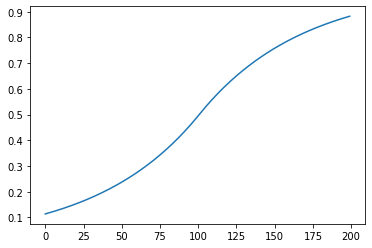

In [975]:
y_val = [cdf_L(x) for x in np.arange(-1,1, 0.01)]
plt.plot(y_val)

In [976]:
df[['PKNORLEN_ln_diff']]

,PKNORLEN_ln_diff
0,0.619822
1,-0.109089
2,0.430555
3,-0.671914
4,0.785220
...,...
214,2.561852
215,0.159420
216,0.081795
217,-1.520046


In [977]:
xt = df['PKNORLEN_ln_diff'].apply(cdf_L)

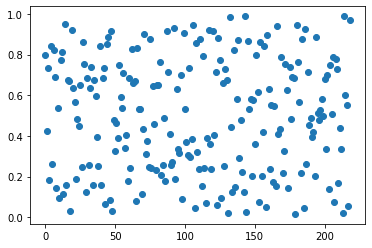

In [978]:
plt.scatter(xt.index,xt)

<AxesSubplot:>

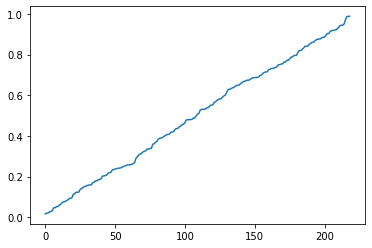

In [979]:
xt.sort_values().reset_index(drop=True).plot()

In [980]:
cl = 3;
d = 1 + cl #(* dimension = 1 + context length *)
m = 4 #(* maximal degree of polynomial *)

coefn = np.power(m+1,d)
print(coefn, "coefficients")

625 coefficients


In [981]:
ct = pd.DataFrame(np.transpose([xt.shift(i).values for i in range(0,d)]))
ct = ct[d:]
ct.reset_index(drop=True)

,0,1,2,3
0,0.840979,0.184530,0.732134,0.422129
1,0.263254,0.840979,0.184530,0.732134
2,0.819925,0.263254,0.840979,0.184530
3,0.687493,0.819925,0.263254,0.840979
4,0.141794,0.687493,0.819925,0.263254
...,...,...,...,...
210,0.988331,0.020245,0.334418,0.437081
211,0.600934,0.988331,0.020245,0.334418
212,0.552688,0.600934,0.988331,0.020245
213,0.053029,0.552688,0.600934,0.988331


In [982]:
p = [
    lambda x: 1,
    lambda x: np.sqrt(3)*(-1+2*x),
    lambda x: np.sqrt(5)*(1-6*x-6*x**2),
    lambda x: np.sqrt(7)*(-1+12*x-30*x**2 + 20*x**3),
    lambda x: 3 *(1-20*x+90*x**2-140*x**3+70*x**4),
]

In [983]:
# Create a list of values
values = []
for j in range(1, m+2):
    if j == 1:
        ans = []
        for index, columnData in ct.iteritems():
            ans.append([1 for i in range(len(columnData.values))])
        values.append(ans)

    else:
        ans = []
        for index, columnData in ct.iteritems():
            ans.append([p[j-1](x) for x in columnData.values])
        values.append(ans)

ctp = np.array(values)
ctp.shape

(5, 4, 215)

In [984]:
ctp.mean(axis=0)

array([[-3.64624805, -0.3212556 , -3.55263919, -2.60322942, -0.19148426,
        -1.40519403, -0.09421444, -3.2609862 , -3.50751209, -0.14430192,
        -3.63642368, -0.21457269, -2.47779883, -2.44079594,  0.16322301,
        -3.73771605, -2.16868194, -1.61913614, -0.24577822, -1.02458629,
        -0.84777077, -2.29249491, -0.30602879, -3.70873606, -3.14125678,
        -0.16071101, -2.59761722, -0.31531958, -2.18213811, -3.03735103,
        -0.21474612, -2.49285152, -1.84389613, -0.62558434, -0.31130491,
        -3.64411422, -0.21645079, -2.58958421, -2.98366775,  0.01211048,
        -3.68138792, -3.75565729, -0.06280295, -3.74465306,  0.17912838,
        -1.01950089, -0.42557527, -0.93859912, -0.59762868, -3.10745661,
        -1.79943039, -1.40442935, -2.77829044, -0.45118823, -0.65997452,
        -0.2392517 , -2.57131063, -0.29898903, -3.58056833, -2.39166556,
        -2.43604713, -0.05069374, -3.61031544, -1.35002716, -1.34395572,
        -0.13702471, -0.77215199, -3.76048566, -0.3

In [ ]:
coef_t = [1.,-0.00196169,0.0814309,0.0769936,-0.155418,-0.00473808,-0.429613,0.14169,-0.0010541,0.0386489,0.0749012,-0.0390797,0.18743,-0.190617,-0.036238,0.0715073,-0.0434481,0.065754,-0.117369,0.155852,-0.152933,-0.147765,0.0190857,-0.1316,0.0127966,-0.0147492,0.00162889,0.0141412,-0.0664177,-0.0956783,-0.44024,-0.0962892,-0.0345368,0.0216849,0.175262,0.139895,0.199097,0.0297875,0.0180211,-0.105309,0.00670114,-0.0424808,0.0207315,0.104047,0.0658121,0.0491279,-0.0504472,-0.00000792983,0.0126893,-0.0430567,0.074113,0.00742992,0.0908227,-0.00584981,-0.0609439,-0.0381636,-0.0236248,-0.00515477,-0.0162975,0.0526033,0.191411,0.0548206,-0.0924762,-0.0386657,-0.0864344,-0.186543,-0.13684,-0.0914095,0.100229,0.0834771,-0.0369818,0.158707,-0.0797331,-0.00665678,-0.161938,0.0888348,-0.0599171,-0.0203459,-0.0172792,-0.067755,-0.0251624,-0.0635982,0.0588473,0.0815524,0.187697,0.068606,0.0437985,0.0294973,-0.128111,-0.0728424,-0.131006,-0.0273732,0.0643111,-0.068688,0.082515,0.137812,0.128672,0.0898504,-0.0279011,0.0604688,-0.15119,0.0731418,-0.0342403,-0.0832003,0.0238682,-0.145281,-0.0150098,-0.0730961,-0.0870697,0.0326541,0.0208868,0.116175,-0.017581,0.0528043,-0.0370269,-0.1317,0.0895141,-0.0949196,0.101119,0.170857,0.0104051,0.141469,0.00362996,-0.068584,-0.0649646,-0.0254427,-0.107138,-0.0589218,-0.0525004,-0.0167166,-0.0111717,0.162547,-0.00524844,-0.160439,0.125403,0.00881627,-0.0214532,-0.000689705,0.0283911,0.0241691,-0.0609969,0.0200181,-0.0447329,-0.0895548,0.037149,-0.0831882,0.0729857,0.0649925,0.0224396,-0.0173378,-0.446218,-0.0586491,0.0666647,0.0683133,-0.0994192,-0.103926,0.368219,-0.0622949,0.0132045,0.114834,-0.0386449,-0.0628931,-0.150763,0.200813,-0.122461,0.0237643,-0.0488335,-0.0453967,0.0120243,-0.122506,0.182674,-0.0653667,0.0816599,0.118603,0.106137,0.146176,-0.0394835,0.0208614,0.083735,0.0664131,0.206578,0.0629507,-0.066688,-0.242176,-0.0202079,0.0328258,-0.188717,0.057901,0.0833297,0.0119485,0.0147625,-0.00962036,0.0609666,-0.0160749,0.0197561,-0.11261,0.0235021,0.0211326,-0.112556,-0.0246209,0.0166297,-0.00724747,-0.0854491,0.0269437,-0.000609485,-0.029763,0.0238625,0.0161939,-0.0502344,0.0684408,0.0276341,-0.0623647,0.232022,0.0810103,-0.00145134,0.10066,-0.07449,0.0608848,-0.172428,-0.0716659,0.05347,-0.0764801,-0.0361212,-0.0624585,0.065806,0.0526066,0.109577,0.132362,0.128353,-0.036756,-0.0461992,-0.0710587,-0.0704441,-0.0487945,-0.119995,0.00192141,0.0127292,-0.00381283,0.074909,-0.125598,0.0110915,0.0160487,-0.0210144,0.146005,-0.107088,-0.0471948,-0.0706154,-0.175198,0.0674938,0.0362741,0.0607353,-0.0241084,-0.00954724,0.0822887,0.102362,-0.00605425,-0.108397,-0.0466498,-0.0923513,-0.0126677,0.0901102,-0.0847712,0.00618319,0.0263856,-0.0654868,0.00593009,0.0683785,0.00452606,0.0971981,0.0344488,-0.0475826,-0.0761683,-0.00190508,0.129145,-0.0711303,-0.0365205,0.0698808,0.0595227,0.0411966,-0.133722,-0.0234957,0.0803537,-0.00450122,0.0428746,-0.00857538,-0.00865863,0.0129303,0.038597,0.0801884,0.00557005,-0.0207618,0.150877,0.0283002,-0.239963,-0.0395505,0.052329,-0.162494,-0.0880092,-0.0889918,0.134537,0.199986,-0.0926508,-0.0196722,0.082904,-0.0397505,0.0633436,-0.0691926,0.00800677,-0.125171,-0.162457,-0.0923022,-0.0434138,-0.0166401,0.0662161,0.0962627,-0.0464541,0.213048,-0.0169609,0.0390883,0.0905954,-0.0948912,-0.0219037,0.0110065,0.000445625,-0.0440374,-0.189909,-0.0646132,-0.0663502,0.140908,0.0786163,-0.13759,0.077725,0.0140396,0.0956258,-0.0517306,-0.0853727,-0.00481233,-0.130554,-0.000169367,0.0542413,0.108416,0.0339579,-0.0796183,-0.0312251,-0.0041431,0.0844732,-0.0776889,0.0527161,0.138711,0.0767383,-0.0342184,-0.000383116,0.01343,-0.139031,0.0525082,0.161758,0.129877,0.0601006,-0.104988,-0.0317034,-0.0789605,-0.0242165,0.0271977,0.00312099,0.149781,-0.00856465,0.00433365,0.00558648,-0.139729,-0.110046,-0.164936,0.0708147,-0.0153427,0.0285892,0.0624216,0.0937743,-0.00830379,-0.113466,-0.00619713,0.125461,-0.0547364,-0.0597542,0.0948831,0.0227634,0.014436,-0.0196079,-0.0485256,0.106761,-0.0469652,0.0108573,-0.0212296,-0.0338883,-0.0135215,0.0141677,0.00996982,-0.0728692,0.0575442,0.0171435,-0.063982,-0.030189,-0.0250409,0.0325305,-0.0286262,-0.00509762,0.0588908,-0.0628728,-0.024717,-0.0148594,0.0717741,0.00363928,0.0602716,0.0130207,-0.0262223,-0.0477747,-0.0127791,0.0826367,0.0486058,0.0157126,0.00674733,0.024122,0.187036,0.0162939,-0.0233443,-0.0115227,-0.157656,0.0654972,-0.0104662,0.009899,-0.151987,0.0114121,0.0405849,-0.0121746,0.120753,-0.0237531,-0.0183375,0.0291435,-0.0126893,-0.0784557,-0.0466271,-0.0768849,-0.125531,-0.00067732,-0.129293,0.186241,0.0774714,-0.0696657,0.202556,0.0465967,0.129068,-0.19638,-0.131024,0.0724257,-0.0676097,-0.0402084,0.0419719,-0.0284265,0.0160146,-0.0278745,0.160182,0.123736,0.0618747,0.0903707,-0.0108231,-0.0871732,-0.0753296,-0.0707189,-0.133517,0.0411847,0.0139804,-0.00741355,0.0834594,-0.00668737,0.00576197,-0.109363,0.0112756,0.136665,-0.0404586,0.0564657,-0.153047,-0.0511127,0.127364,-0.279857,0.0735425,0.0453013,0.0514717,0.0894341,0.0120376,0.0916298,-0.165407,-0.0118151,-0.0271894,-0.0404421,0.0822569,-0.0170961,0.091588,0.0617497,0.0603559,-0.0343298,0.0255781,0.0461328,-0.134627,-0.0406237,-0.0720982,-0.11509,-0.065496,0.090695,0.138646,-0.00477454,0.117851,-0.046228,-0.0313391,0.0961125,-0.102889,-0.0121459,-0.142549,-0.0960886,0.0368595,-0.0529108,0.0874762,-0.0658968,0.00655726,0.0663304,-0.00704492,0.224525,0.0323743,-0.14422,0.0535777,-0.0548651,0.00992124,-0.0426661,-0.0118836,0.108481,-0.140206,0.120157,0.11509,-0.0682029,0.0558989,-0.0984242,-0.0725095,0.110165,-0.0839405,-0.0333936,0.0398911,-0.0564528,0.064178,0.0297535,-0.0700407,0.059478,-0.0379939,0.0024575,0.0105139,-0.120147,0.0377303,-0.0541144,0.00157218,0.10534,-0.0234328,0.101507,-0.017091,0.0433285,-0.0190273,-0.0728408,0.0921161,-0.0363585,0.0181299,0.0611874,-0.0289074,-0.00589403,-0.0645108,-0.0399171,-0.0263265,0.0119608,-0.00429817,-0.0141378,0.0548957,-0.13289,0.113991,0.0523603,0.114945,0.0901552,0.0847882,0.131732,-0.152832,-0.0557498,-0.187656,-0.103276,-0.0332959,0.00662989,0.117201,0.00981765,0.0951997,-0.029758,0.164678,0.13616,-0.0800942,0.175202,-0.0839018,-0.0724383,-0.157636,-0.167388,0.00644461,-0.0793431,0.0426427,0.0101698,-0.0303655,0.136923,-0.0793304,0.0891494,0.0530187,-0.0540908,0.00211642,-0.0258823,-0.089993,-0.121402,0.0756533,-0.066191,0.0325498,0.00722393,0.0520427,-0.00716159,-0.0605133,0.0808737,-0.0375763,-0.0548799,0.0290943]

len(coef_t)

625